<a href="https://colab.research.google.com/github/NikMilch/hotel_demaond/blob/main/PROJECT_HOTEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from skimage import data, color

import networkx as nx

import datetime

import re

import nltk
from nltk.corpus import stopwords

from collections import Counter

import skimage.io
from scipy.ndimage.filters import convolve
from skimage.feature import canny
from skimage.util import crop

from skimage.feature import Cascade
from matplotlib import patches

In hotel review dataset number of the positive reviews is higher than a number of negative reviews. Negative reviews are longer than positive reviews.

In [ ]:
hotel_reviews = pd.read_csv('hotel_reviews_enriched.csv')

In [ ]:
# Check first 5 lines of the frame

hotel_reviews.head()

,id,Hotel_Name,Hotel_Address,Hotel_Country,Hotel_State,Hotel_City,Hotel_lat,Hotel_lng,Businesses_100m,Businesses_1km,...,Reviewer_Country,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Average_Score,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given,Additional_Number_of_Scoring,Submitted_from_Mobile
0,13,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,NaN,I am so angry that i made this post available ...,397,Only the park outside of the hotel was beautiful,11,8,3,7,194,0
1,14,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,IE,No Negative,0,No real complaints the hotel was great great l...,105,8,8,7,194,0
2,15,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,AU,Rooms are nice but for elderly a bit difficult...,42,Location was good and staff were ok It is cute...,21,8,7,9,194,1
3,16,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,GB,My room was dirty and I was afraid to walk bar...,210,Great location in nice surroundings the bar an...,26,8,4,1,194,0
4,17,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,NZ,You When I booked with your company on line yo...,140,Amazing location and building Romantic setting,8,8,7,3,194,1


In [ ]:
# Check the last lines of the frame

hotel_reviews.tail(2)

,id,Hotel_Name,Hotel_Address,Hotel_Country,Hotel_State,Hotel_City,Hotel_lat,Hotel_lng,Businesses_100m,Businesses_1km,...,Reviewer_Country,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Average_Score,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given,Additional_Number_of_Scoring,Submitted_from_Mobile
515736,515749,Atlantis Hotel Vienna,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,AT,9,Vienna,48.203745,16.335677,35.0,917.0,...,MX,No Negative,0,The rooms are enormous and really comfortable ...,25,8,9,3,168,0
515737,515750,Atlantis Hotel Vienna,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,AT,9,Vienna,48.203745,16.335677,35.0,917.0,...,HU,I was in 3rd floor It didn t work Free Wife,13,staff was very kind,6,8,8,1,168,0


In [ ]:
hotel_reviews.shape

(515738, 41)

In [ ]:
# List all of the columns from the dataframe

hotel_reviews.columns

Index(['id', 'Hotel_Name', 'Hotel_Address', 'Hotel_Country', 'Hotel_State',
       'Hotel_City', 'Hotel_lat', 'Hotel_lng', 'Businesses_100m',
       'Businesses_1km', 'Businesses_5km', 'Room_Type', 'Room_Type_Level',
       'Bed_Type', 'Tags', 'Guest_Type', 'Trip_Type', 'Stay_Duration',
       'Review_Date', 'Day_of_Week', 'Day_of_Year', 'Days_Since_Review',
       'Week_of_Month', 'Week_of_Year', 'Is_Hotel_Holiday',
       'Is_Reviewer_Holiday', 'Quarter_of_Year', 'Total_Number_of_Reviews',
       'Review_Is_Positive', 'Review_Positivity_Rate', 'Reviewer_Nationality',
       'Reviewer_Country', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Positive_Review',
       'Review_Total_Positive_Word_Counts', 'Average_Score', 'Reviewer_Score',
       'Total_Number_of_Reviews_Reviewer_Has_Given',
       'Additional_Number_of_Scoring', 'Submitted_from_Mobile'],
      dtype='object')

In [ ]:
# Check the unique values colum by colum in order to select the columns with info that is needed 

hotel_reviews['Submitted_from_Mobile'].unique()

array([0, 1], dtype=int64)

In [ ]:
# Selecting the comumns that we need for the research

hotel_data = hotel_reviews[['id', 'Hotel_Name', 'Hotel_Country', 'Hotel_City', 'Hotel_lat', 'Hotel_lng', 'Businesses_100m', 'Businesses_1km',
                           'Room_Type_Level', 'Bed_Type', 'Guest_Type', 'Stay_Duration', 'Review_Date', 'Total_Number_of_Reviews', 'Review_Is_Positive',
                           'Review_Positivity_Rate', 'Reviewer_Nationality', 'Average_Score', 'Reviewer_Score', 'Total_Number_of_Reviews_Reviewer_Has_Given',
                           'Submitted_from_Mobile']]

In [ ]:
# Rename columns 

hotel_data.columns = ['id', 'hotel_name', 'country', 'city', 'lat', 'lng', 'businesses_100m', 'businesses_1km',
                           'room_type', 'bed_type', 'guest_type', 'stay_duration', 'review_date', 'total_reviews', 'is_positive',
                           'positivity_rate', 'reviewer_nationality', 'avr_score', 'reviewer_score', 'total_reviews_reviewer_has_given',
                           'from_mobile']

In [ ]:
# set id as index

hotel_data.set_index("id")

,hotel_name,country,city,lat,lng,businesses_100m,businesses_1km,room_type,bed_type,guest_type,stay_duration,review_date,total_reviews,is_positive,positivity_rate,reviewer_nationality,avr_score,reviewer_score,total_reviews_reviewer_has_given,from_mobile
id,,,,,,,,,,,,,,,,,,,,
13,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Duplex,Double,Couple,6.0,20170803,1403,0,2.69608,Russia,8,3,7,0
14,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Duplex,Double,Couple,4.0,20170803,1403,1,100.00000,Ireland,8,8,7,0
15,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Duplex,Double,Family with young children,3.0,20170731,1403,0,33.33330,Australia,8,7,9,1
16,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Duplex,Double,Solo traveler,3.0,20170731,1403,0,11.01690,United Kingdom,8,4,1,0
17,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Suite,NaN,Couple,2.0,20170724,1403,0,5.40541,New Zealand,8,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515746,Atlantis Hotel Vienna,AT,Vienna,48.203745,16.335677,35.0,917.0,NaN,NaN,Family with older children,5.0,20150830,2823,0,12.50000,Kuwait,8,7,8,0
515747,Atlantis Hotel Vienna,AT,Vienna,48.203745,16.335677,35.0,917.0,NaN,Triple,Family with young children,2.0,20150822,2823,0,50.00000,Estonia,8,6,12,0
515748,Atlantis Hotel Vienna,AT,Vienna,48.203745,16.335677,35.0,917.0,NaN,NaN,Family with older children,4.0,20150819,2823,0,0.00000,Egypt,8,3,3,1


In [ ]:
# checking the data types of the columns 

hotel_data.dtypes

id                                    int64
hotel_name                           object
country                              object
city                                 object
lat                                 float64
lng                                 float64
businesses_100m                     float64
businesses_1km                      float64
room_type                            object
bed_type                             object
guest_type                           object
stay_duration                       float64
review_date                           int64
total_reviews                         int64
is_positive                           int64
positivity_rate                     float64
reviewer_nationality                 object
avr_score                             int64
reviewer_score                        int64
total_reviews_reviewer_has_given      int64
from_mobile                           int64
dtype: object

In [ ]:
# convert 'is_positive' and 'form_mobile' to bolean 
hotel_data[['is_positive', 'from_mobile']] = hotel_data[['is_positive', 'from_mobile']].astype('bool')

C:\Users\Luxottica\Downloads\ARABULGARIA\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# convert 'review_date' to datetime

hotel_data['review_date'] = pd.to_datetime(hotel_data['review_date'].astype(str), format = "%Y-%m-%d")

C:\Users\Luxottica\Downloads\ARABULGARIA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# convert 'review_date' to datetime

hotel_data['review_date'] = pd.to_datetime(hotel_data['review_date'].astype(str), format = "%Y-%m-%d")

C:\Users\Luxottica\Downloads\ARABULGARIA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def positivity_reviews_group(dataframe):

    positive_reviews = dataframe.groupby('is_positive')['is_positive'].count()
    mobile_devices = dataframe.groupby('from_mobile')['from_mobile'].count()
    mobile_devices_true = dataframe[hotel_data['from_mobile'] == True]
    positive_mobile_devices = dataframe.groupby('is_positive')['from_mobile'].count()
    
    return positive_reviews, mobile_devices, positive_mobile_devices

In [ ]:
positive_reviews, mobile_devices, positive_mobile_devices = positivity_reviews_group(hotel_data)

In [ ]:
positive_mobile_devices

is_positive
False    244158
True     271580
Name: from_mobile, dtype: int64

In [ ]:
positive_reviews

is_positive
False    244158
True     271580
Name: is_positive, dtype: int64

In [ ]:
mobile_devices

from_mobile
False    208098
True     307640
Name: from_mobile, dtype: int64

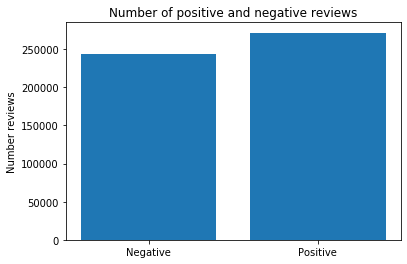

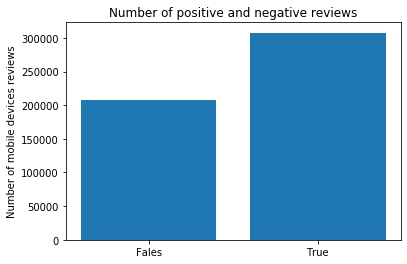

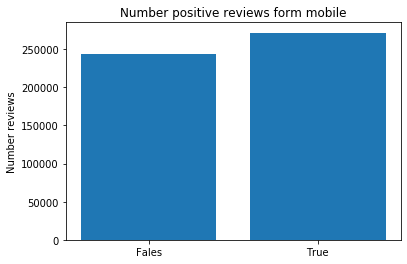

In [ ]:
plt.bar(positive_reviews.index, positive_reviews)
plt.title('Number of positive and negative reviews')
plt.xticks(range(2), ['Negative', 'Positive'])
plt.ylabel("Number reviews")

plt.show()

plt.bar(mobile_devices.index, mobile_devices)
plt.title('Number of positive and negative reviews')
plt.xticks(range(2), ['Fales', 'True'])
plt.ylabel("Number of mobile devices reviews")

plt.show()

plt.bar(positive_mobile_devices.index, positive_mobile_devices)
plt.title('Number positive reviews form mobile')
plt.xticks(range(2), ['Fales', 'True'])
plt.ylabel("Number reviews")

plt.show()

In [ ]:
#Finding correlation between different columns
hotel_data['total_reviews'].corr(hotel_data['positivity_rate'])

-0.06341834328737563

In [ ]:
hotel_data['positivity_rate'].corr(hotel_data['avr_score'])

0.18634563253111214

In [ ]:
hotel_data['stay_duration'].corr(hotel_data['positivity_rate'])

-0.015384144909829034

In [ ]:
hotel_data['businesses_1km'].corr(hotel_data['positivity_rate'])

0.057353073885860785

In [ ]:
hotel_data['total_reviews'].corr(hotel_data['positivity_rate'])

-0.06341834328737563

In [ ]:
hotel_data_after_2017 = hotel_data[hotel_data['review_date'] >= '2017-08-01']

In [ ]:
def corr_businesses_and_hotle_location(dataframe):
    
    positive_rate_business = dataframe.groupby('positivity_rate')['businesses_1km'].describe()
    corr_business = dataframe.groupby('businesses_100m')['businesses_1km'].describe()
    average_score_and_businesses = dataframe.groupby("avr_score")["businesses_1km"].count()
    
    return corr_business, positive_rate_business, average_score_and_businesses

In [ ]:
corr_business, positive_rate_business, average_score_and_businesses = corr_businesses_and_hotle_location(hotel_data_after_2017)

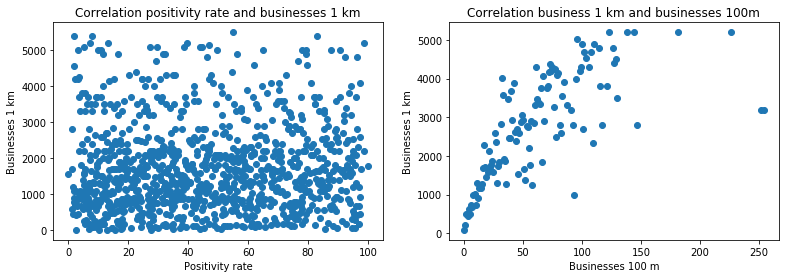

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (13, 4))

ax[0].scatter(positive_rate_business.index, positive_rate_business["mean"])
ax[0].set_title("Correlation positivity rate and businesses 1 km")
ax[0].set_xlabel("Positivity rate")
ax[0].set_ylabel("Businesses 1 km")

ax[1].scatter(corr_business.index, corr_business["mean"])
ax[1].set_title("Correlation business 1 km and businesses 100m")
ax[1].set_xlabel("Businesses 100 m")
ax[1].set_ylabel("Businesses 1 km")


plt.show()

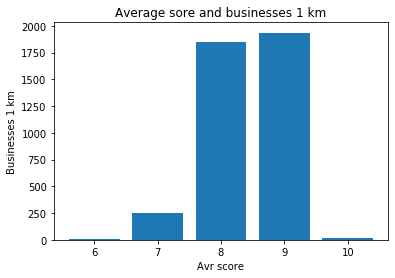

In [ ]:
plt.bar(average_score_and_businesses.index, average_score_and_businesses)
plt.title("Average sore and businesses 1 km")
plt.xlabel("Avr score")
plt.ylabel("Businesses 1 km")

plt.show()

In [ ]:
def country_and_positivity_rate(dataframe):

    country = []
    mean_rate = []

    for country_name, group_data in dataframe.groupby('country'):
        country.append(country_name)
        mean_rate.append(group_data.positivity_rate.mean())
    
    return country, mean_rate

In [ ]:
country, mean_rate = country_and_positivity_rate(hotel_data_after_2017)

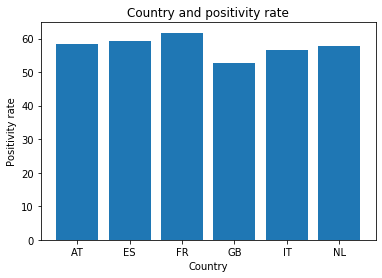

In [ ]:
plt.bar(country, mean_rate)
plt.title("Country and positivity rate")
plt.xlabel("Country")
plt.ylabel("Positivity rate")
plt.show()


In [ ]:
def best_and_worst_hotel_reviews(dataframe):

    best_hotels_reviews = dataframe.groupby('hotel_name')['positivity_rate'].mean().sort_values(ascending = False).head(10)
    worst_hotels_reviews = dataframe.groupby('hotel_name')['positivity_rate'].mean().sort_values(ascending = True).head(10)
    
    return best_hotels_reviews, worst_hotels_reviews

In [ ]:
best_hotels_reviews, worst_hotels_reviews = best_and_worst_hotel_reviews(hotel_data)

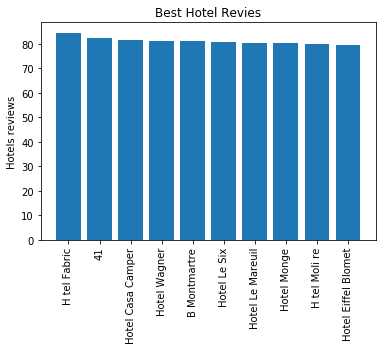

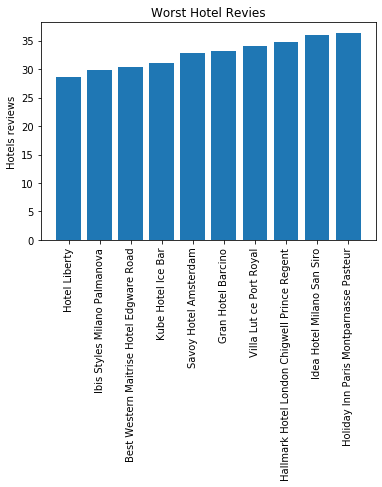

In [ ]:
plt.bar(range(len(best_hotels_reviews)) , best_hotels_reviews)
plt.title('Best Hotel Revies')
plt.xticks(range(len(best_hotels_reviews)), best_hotels_reviews.index, rotation = "vertical")
plt.ylabel("Hotels reviews")

plt.show()
plt.bar(range(len(worst_hotels_reviews)) , worst_hotels_reviews)
plt.xticks(range(len(worst_hotels_reviews)), worst_hotels_reviews.index, rotation = "vertical")
plt.title('Worst Hotel Revies')
plt.ylabel("Hotels reviews")
plt.show()


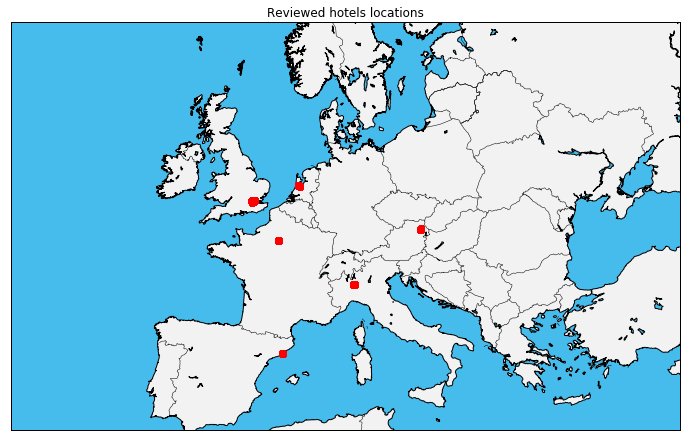

In [ ]:
plt.figure(figsize = (12, 10))
m = Basemap(llcrnrlon=-20,llcrnrlat=35,
            urcrnrlon= 48,urcrnrlat=52,
            resolution="i", # Set using letters, e.g. c is a crude drawing, f is a full detailed drawing
            projection= "merc", # The projection style is what gives us a 2D view of the world for this
            lon_0=-0.1,lat_0=51.5, # Setting the central point of the image
            epsg=27700) # Setting the coordinate system we're using

m.drawmapboundary(fill_color="#46bcec") # Make your map into any style you like
m.fillcontinents(color="#f2f2f2",lake_color="#46bcec") # Make your map into any style you like
m.drawcoastlines()
#m.drawrivers() # Default colour is black but it can be customised
m.drawcountries()
m.shadedrelief()

x, y = m(hotel_data.lng.tolist(), 
         hotel_data.lat.tolist())

m.plot(x, y,"o", color = "red")

plt.title("Reviewed hotels locations")

plt.show()

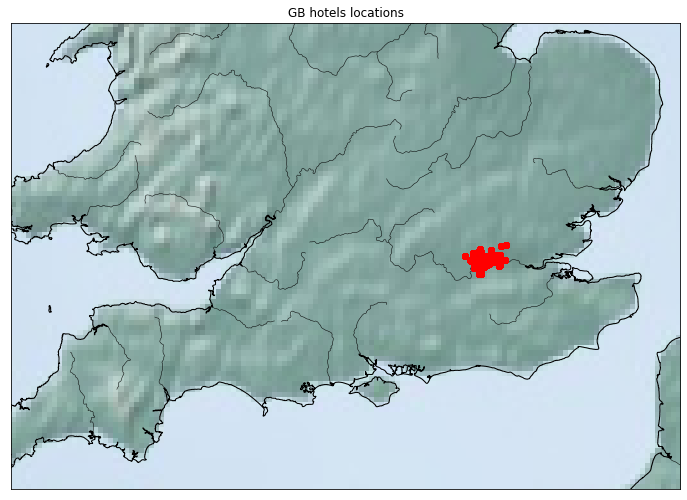

In [ ]:
plt.figure(figsize = (12, 10))
m = Basemap(llcrnrlon=-5,llcrnrlat=50,
            urcrnrlon= 2,urcrnrlat=53,
            resolution="f", # Set using letters, e.g. c is a crude drawing, f is a full detailed drawing
            projection='merk', # The projection style is what gives us a 2D view of the world for this
            lon_0=-0.11,lat_0=51.5, # Setting the central point of the image
            epsg=27700) # Setting the coordinate system we're using

#m.drawmapboundary()# Make your map into any style you like
#m.fillcontinents(color='coral',lake_color='aqua') # Make your map into any style you like
m.drawcoastlines()
m.drawrivers() # Default colour is black but it can be customised
m.drawcountries()
m.shadedrelief()
x, y = m(hotel_data.lng.tolist(), 
         hotel_data.lat.tolist())

m.plot(x, y,"o", color = 'red')

plt.title("GB hotels locations")

plt.show()

In [ ]:
hotel_reviews_analysis = hotel_reviews[["Hotel_Name","Positive_Review", "Negative_Review", "Review_Positivity_Rate"]].sort_values("Review_Positivity_Rate", ascending = False)

In [ ]:
hotel_reviews_analysis

,Hotel_Name,Positive_Review,Negative_Review,Review_Positivity_Rate
377136,IntercityHotel Wien,excellent front office stuff excellent location,No Negative,100.0
269095,Hilton Vienna,Great location Just in front of the Wien Mitte...,No Negative,100.0
100058,Mercure Paris Centre Tour Eiffel,Nothing in this hotel,No Negative,100.0
100061,Mercure Paris Centre Tour Eiffel,The whole hotel was clean staff were very help...,No Negative,100.0
100062,Mercure Paris Centre Tour Eiffel,Excellent Service,No Negative,100.0
...,...,...,...,...
223302,Rydges Kensington Hotel,No Positive,Genlteman at the front desk told me it would b...,0.0
223291,Rydges Kensington Hotel,No Positive,Room was too small with only 1 very small desk...,0.0
431335,Hotel Roemer Amsterdam,No Positive,Room was smaller for us USA travelers but the ...,0.0
223278,Nell Hotel Suites,No Positive,Never received my deposit back,0.0


In [ ]:
h_fabric = hotel_reviews_analysis[hotel_reviews_analysis["Hotel_Name"] == "H tel Fabric"]

In [ ]:
h_fabric.iloc[30,1]

'Very fresh and elegant modern decor staff were always so welcoming and offered great advise to make our stay as enjoyable as possible '

In [ ]:
best_hotel_reviews = ""
with open("best_hotel_rewies.txt", "r", encoding = "utf-8") as file:
    best_hotel_reviews = file.read()

In [ ]:
print(best_hotel_reviews)


'Excellent breakfast Comfortable quiet room Surrounded by many reasonably priced eateries'

'This is my place away from home in Paris Love it'

'Staff was incredibly welcoming and helpful seemed to go out of their way and spoke several languages'

'Spacious well designed rooms Top notch and helpful employees'

'Great place to stay in Paris the kind of Hotel we all want but find difficult to locate'

'Great and super helpful friendly staff'

'Friendly competent staff'

'Friendly helpful staff spotlessly clean bedrooms and a great fresh choice at breakfast'

'really great boutique hotel great location central and near metro shower was amazing'

'4th stay Perfect as usual'

'Friendly staff price location'

'Very helpful staff and very stylish comfortable hotel'

'Lobby honesty bar'

'A quiet hotel in a trendy area Staff very friendly are entirely without attitude'

'Everything is new furniture etc Free of charge tea coffee snacks all day long Good location'

'Great confortable clean hote

In [ ]:
num_itimes_best_hotel_reviews = len(best_hotel_reviews)

In [ ]:
num_itimes_best_hotel_reviews

2362

In [ ]:
counter = Counter(best_hotel_reviews)

In [ ]:
best_hotel_reviews = re.split("\W+", best_hotel_reviews)
best_hotel_reviews = [word.lower() for word in best_hotel_reviews]

In [ ]:
stop = set(stopwords.words("english"))

In [ ]:
best_reviews_hotel_words = [word for word in best_hotel_reviews if word not in stop]

In [ ]:
best_hotel_counter_words = Counter(best_reviews_hotel_words)

In [ ]:
best_hotel_counter_words.most_common(20)

[('staff', 17),
 ('great', 13),
 ('hotel', 10),
 ('friendly', 10),
 ('helpful', 8),
 ('breakfast', 7),
 ('super', 6),
 ('lovely', 6),
 ('stay', 5),
 ('location', 5),
 ('room', 4),
 ('rooms', 4),
 ('clean', 4),
 ('quiet', 3),
 ('place', 3),
 ('welcoming', 3),
 ('perfect', 3),
 ('stylish', 3),
 ('honesty', 3),
 ('bar', 3)]

In [ ]:
h_liberty = hotel_reviews_analysis[hotel_reviews_analysis["Hotel_Name"] == "Hotel Liberty"].sort_values('Review_Positivity_Rate', ascending = True)

In [ ]:
h_liberty.iloc[30,2]

'The room was not clean the bathroom was really dirty so that we needed to tell the staff to clean the bathroom to take a shower which was really not clean in the end The rooms looking at the garden were dark the ones on the road side were really noisy The hotel was with 4 stars which in my opinion not even close to 2 stars You can think of the hotel as a hostel '

In [ ]:
worst_hotel_reviews = ""
with open("worst_hotel_rewies.txt", "r", encoding = "utf-8") as file:
    worst_hotel_reviews = file.read()

In [ ]:
num_itimes_worst_hotel_reviews = len(worst_hotel_reviews)

In [ ]:
num_itimes_worst_hotel_reviews

6614

In [ ]:
worst_hotel_reviews = re.split("\W+", worst_hotel_reviews)
worst_hotel_reviews = [word.lower() for word in worst_hotel_reviews]

In [ ]:
worst_review_hotel_words = [word for word in worst_hotel_reviews if word not in stop]

In [ ]:
worst_hotel_counter_words = Counter(worst_review_hotel_words)

In [ ]:
worst_hotel_counter_words.most_common(20)

[('room', 25),
 ('hotel', 25),
 ('dirty', 14),
 ('shower', 10),
 ('staff', 9),
 ('really', 8),
 ('4', 8),
 ('star', 8),
 ('even', 8),
 ('bathroom', 8),
 ('wifi', 7),
 ('breakfast', 7),
 ('bad', 7),
 ('like', 7),
 ('rooms', 7),
 ('work', 6),
 ('2', 6),
 ('dust', 5),
 ('water', 5),
 ('one', 5)]

In [ ]:
best_hotel_room = skimage.io.imread("hotel_fabric.jpg")

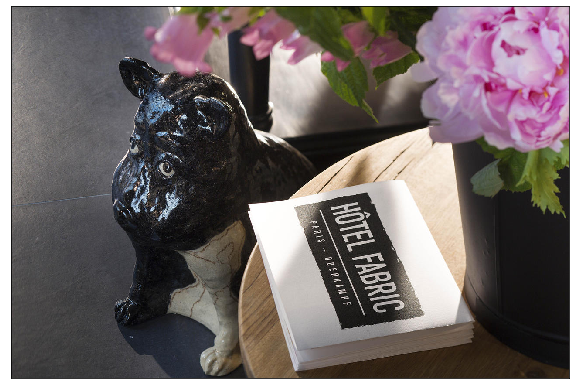

In [ ]:
plt.figure(figsize = (10, 10))

plt.imshow(best_hotel_room)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
best_hotel_room[0][0]

array([109, 107, 108], dtype=uint8)

In [ ]:
def image_rgv2gray_channels(dataframe):
    red_channel = dataframe[:, :, 0]
    green_channel = dataframe[:, :, 1]
    blue_channel = dataframe[:, :, 2]
    
    return red_channel, green_channel, blue_channel

In [ ]:
red_channel, green_channel, blue_channel = image_rgv2gray_channels(best_hotel_room)

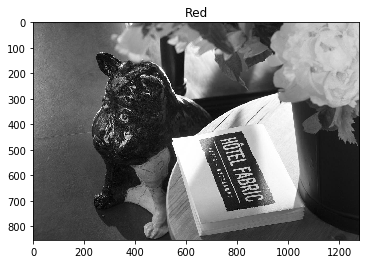

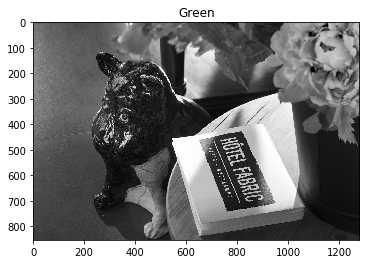

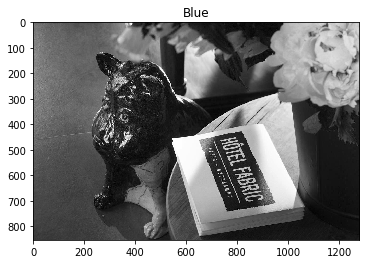

In [ ]:
plt.imshow(red_channel, cmap = "gray")
plt.title("Red")
plt.show()
plt.imshow(green_channel, cmap = "gray")
plt.title("Green")
plt.show()
plt.imshow(blue_channel, cmap = "gray")
plt.title("Blue")
plt.show()

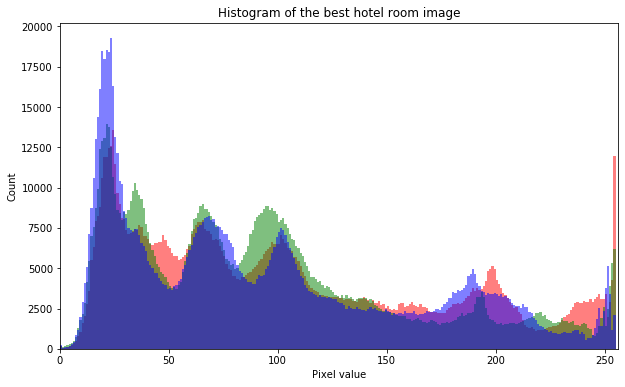

In [ ]:
plt.figure(figsize = (10, 6))


plt.title("Histogram of the best hotel room image")

plt.hist(red_channel.ravel(), bins = range(0, 256), color = "r", alpha = 0.5)
plt.hist(green_channel.ravel(), bins = range(0, 256), color = "g", alpha = 0.5)
plt.hist(blue_channel.ravel(), bins = range(0, 256), color = "b", alpha = 0.5)

plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.xlim(0, 256)

plt.show()

In [ ]:
is_smaller = red_channel <= 50
thresholded_image = red_channel.copy()
thresholded_image[is_smaller] = 0
thresholded_image[~is_smaller] = 255

In [ ]:
binary = red_channel > 80

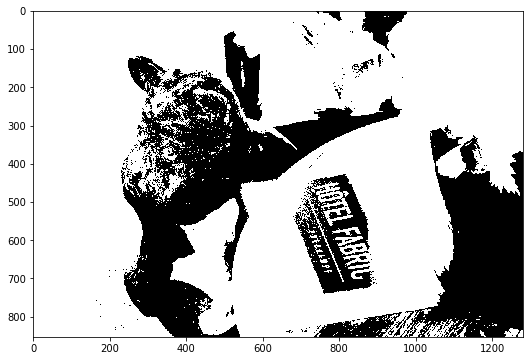

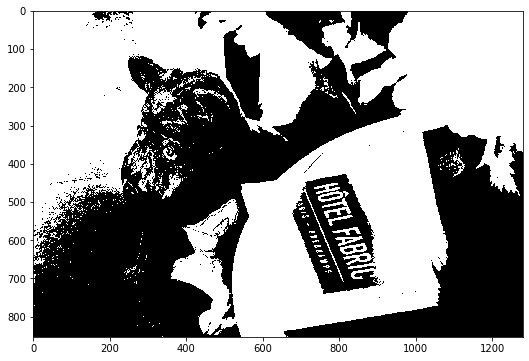

In [ ]:
plt.figure(figsize = (10, 6))


plt.imshow(thresholded_image, cmap = "gray")
plt.show()

plt.figure(figsize = (10, 6))
plt.imshow(binary, cmap ="gray")
plt.show()

In [ ]:
canny_edges = canny(binary)

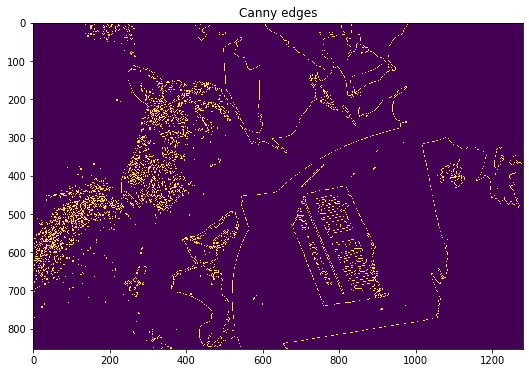

In [ ]:
plt.figure(figsize = (10, 6))
plt.imshow(canny_edges)
plt.title('Canny edges')
plt.show()

In [ ]:
detect_face = skimage.io.imread("detect_face.jpg")

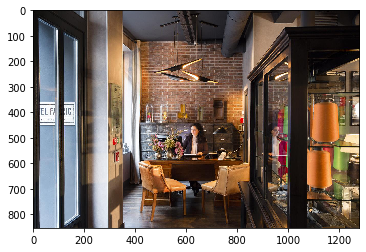

In [ ]:
plt.imshow(detect_face)

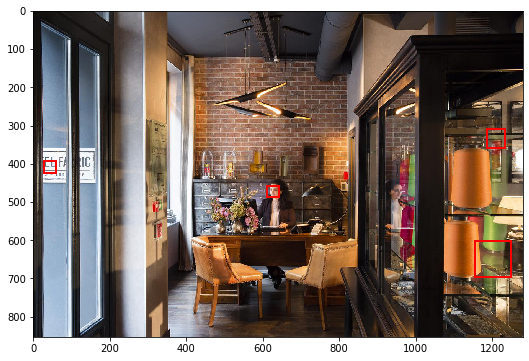

In [ ]:


trained_file = data.lbp_frontal_face_cascade_filename()

detector = Cascade(trained_file)


detected = detector.detect_multi_scale(img = detect_face,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200,200))

plt.figure(figsize = (10, 6))

plt.imshow(detect_face)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()
    

In [ ]:
print(detected)

[{'r': 310, 'c': 1187, 'width': 48, 'height': 48}, {'r': 393, 'c': 27, 'width': 32, 'height': 32}, {'r': 458, 'c': 612, 'width': 30, 'height': 30}, {'r': 602, 'c': 1156, 'width': 94, 'height': 94}]
